In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train_raw = pd.read_csv('Data\\train.csv')
df_train = df_train_raw.copy()
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv('Data\\test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
missing1 = df_train.isna().sum()
missing2 = 100*df_train.isna().mean()
missing_train = pd.concat([missing1, missing2], axis=1)
missing_train.columns = ['count', '%']
missing_train.sort_values(by='%', ascending=False)[0:20]

,count,%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


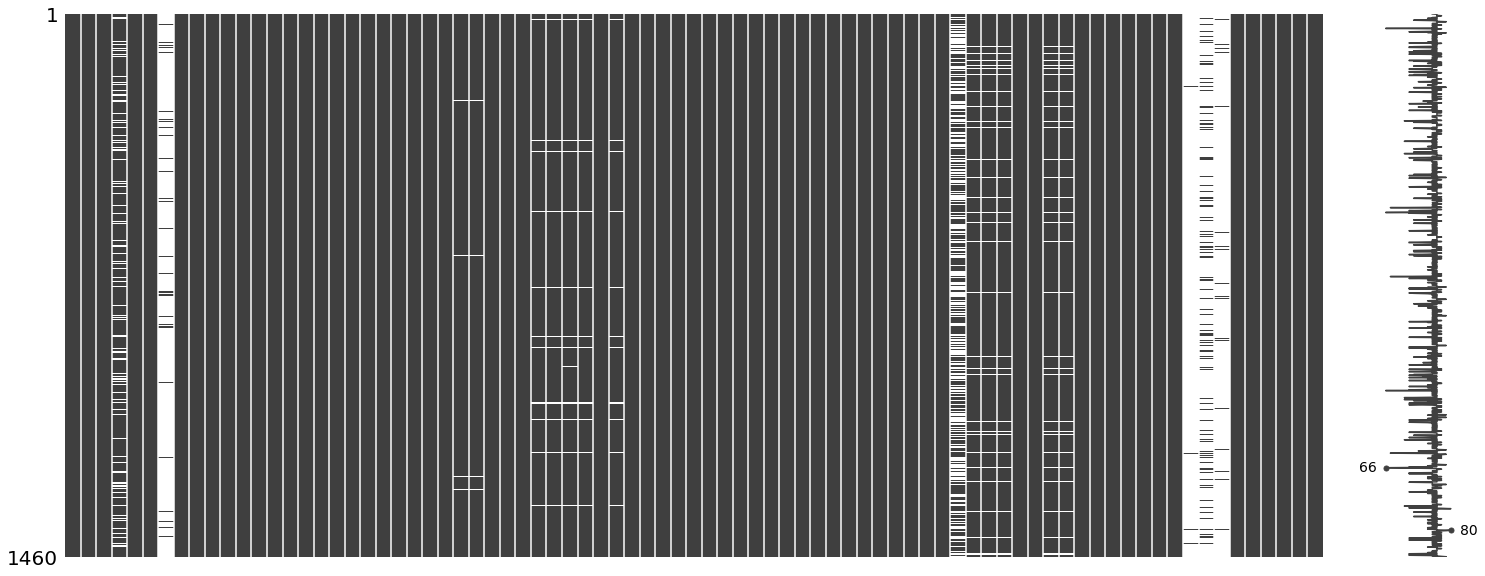

In [8]:
import missingno as msno
ax = msno.matrix(df_train)

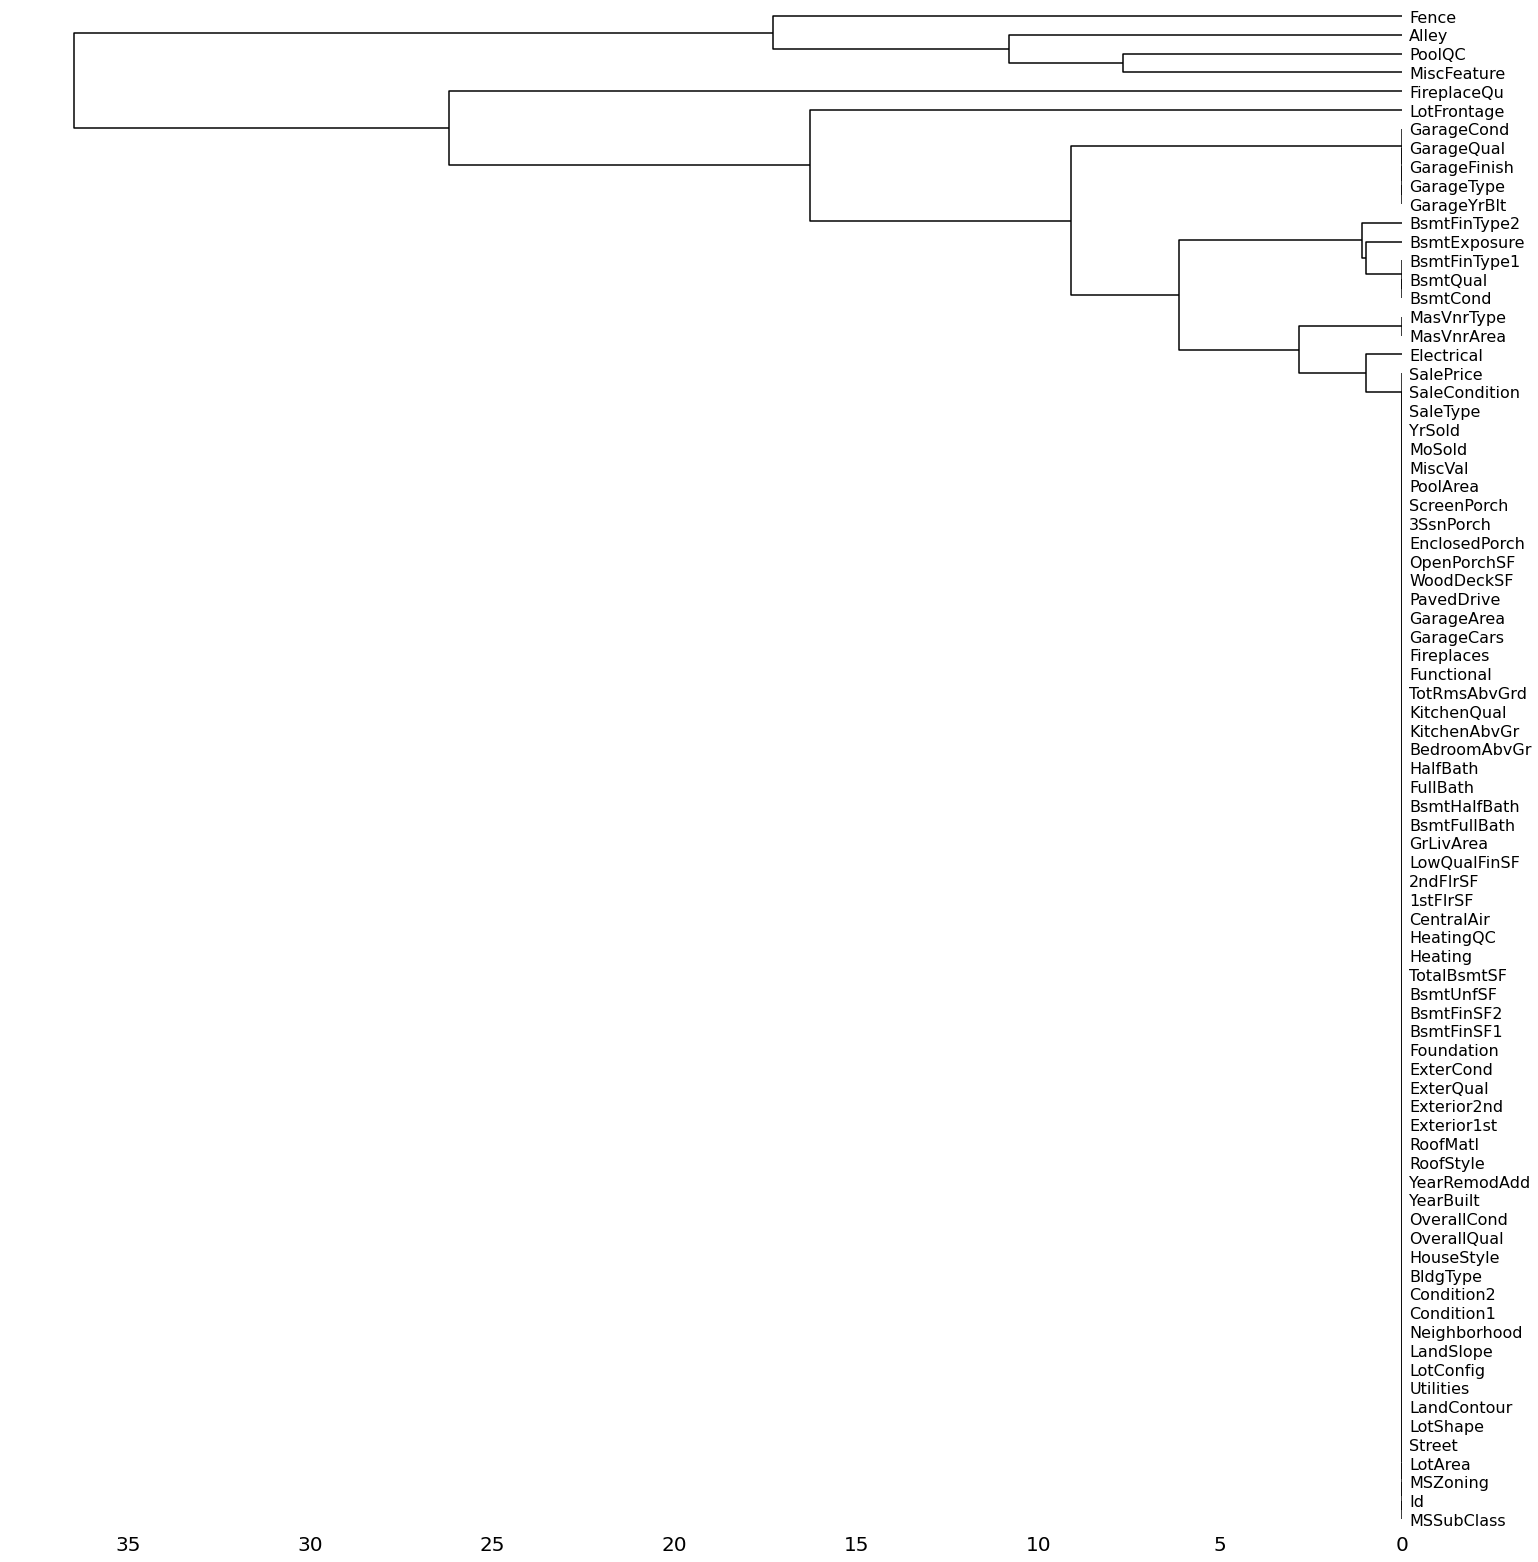

In [9]:
ax = msno.dendrogram(df_train)

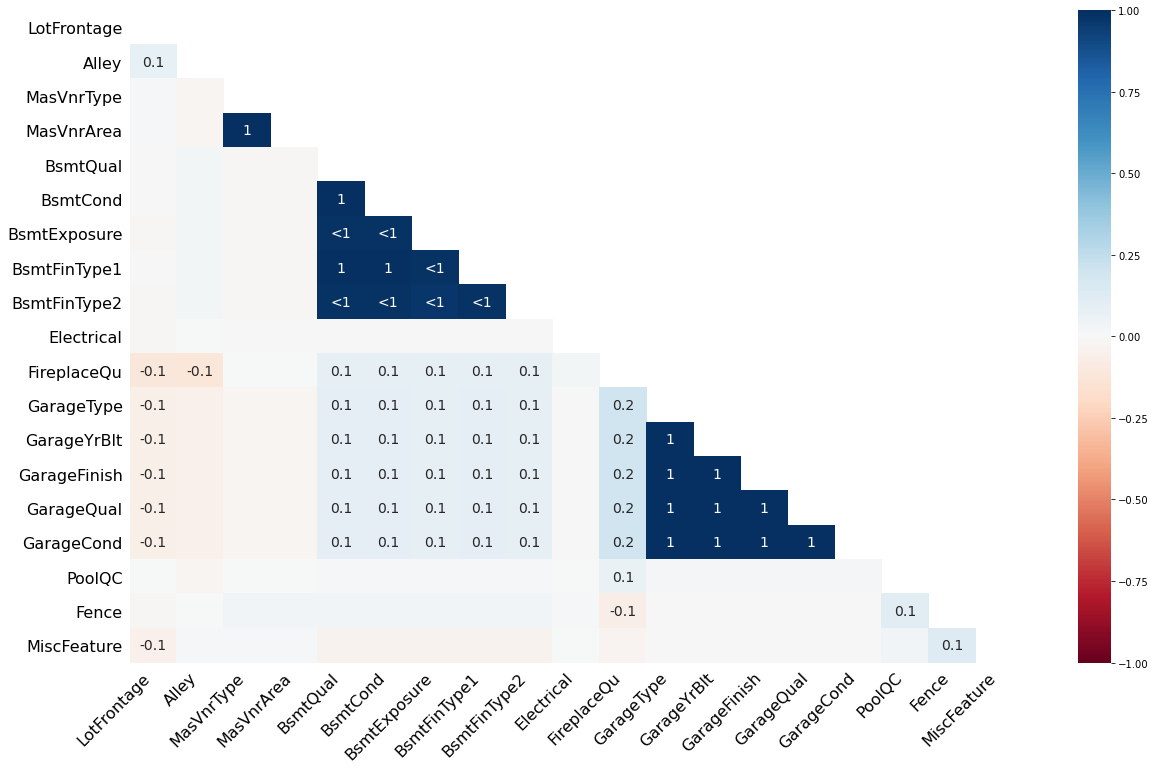

In [10]:
ax = msno.heatmap(df_train)

In [11]:
missing1 = df_test.isna().sum()
missing2 = 100*df_test.isna().mean()
missing_test = pd.concat([missing1, missing2], axis=1)
missing_test.columns = ['count', '%']
missing_test.sort_values(by='%', ascending=False)[0:20]

,count,%
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


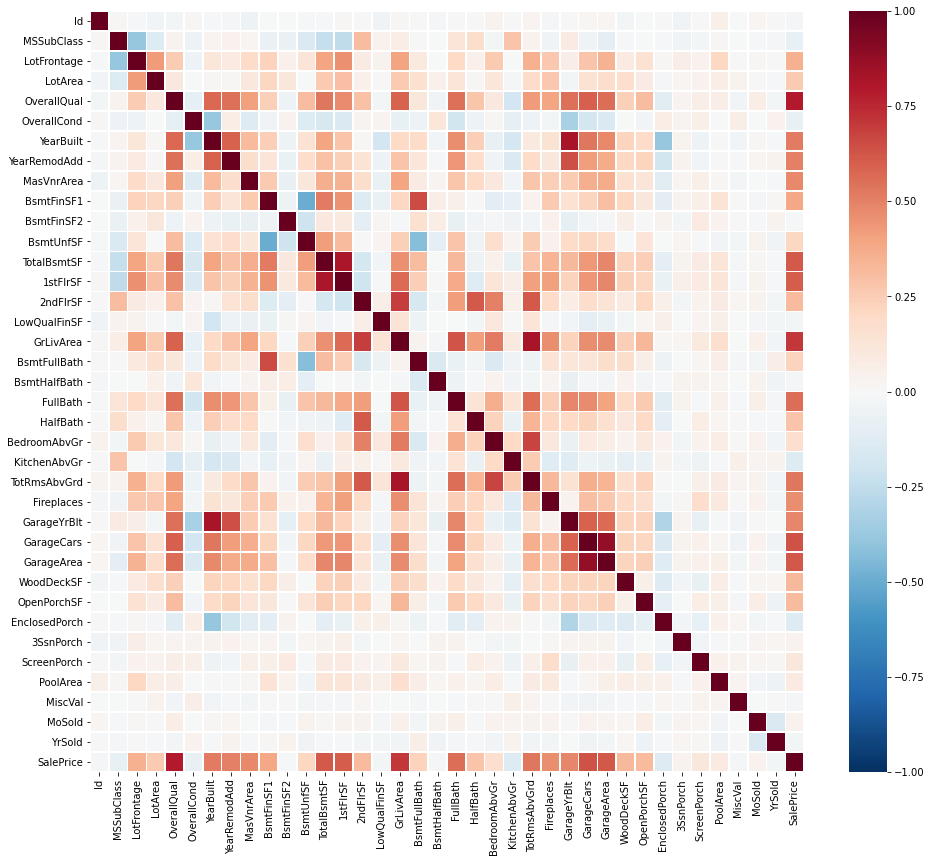

In [12]:
plt.figure(figsize = (16,14))
sns.heatmap(df_train.select_dtypes(np.number).corr() ,xticklabels=df_train.select_dtypes(np.number).corr().columns, yticklabels=df_train.select_dtypes(np.number).corr().columns,cmap="RdBu_r",linewidths=.6,vmin=-1, vmax=1);


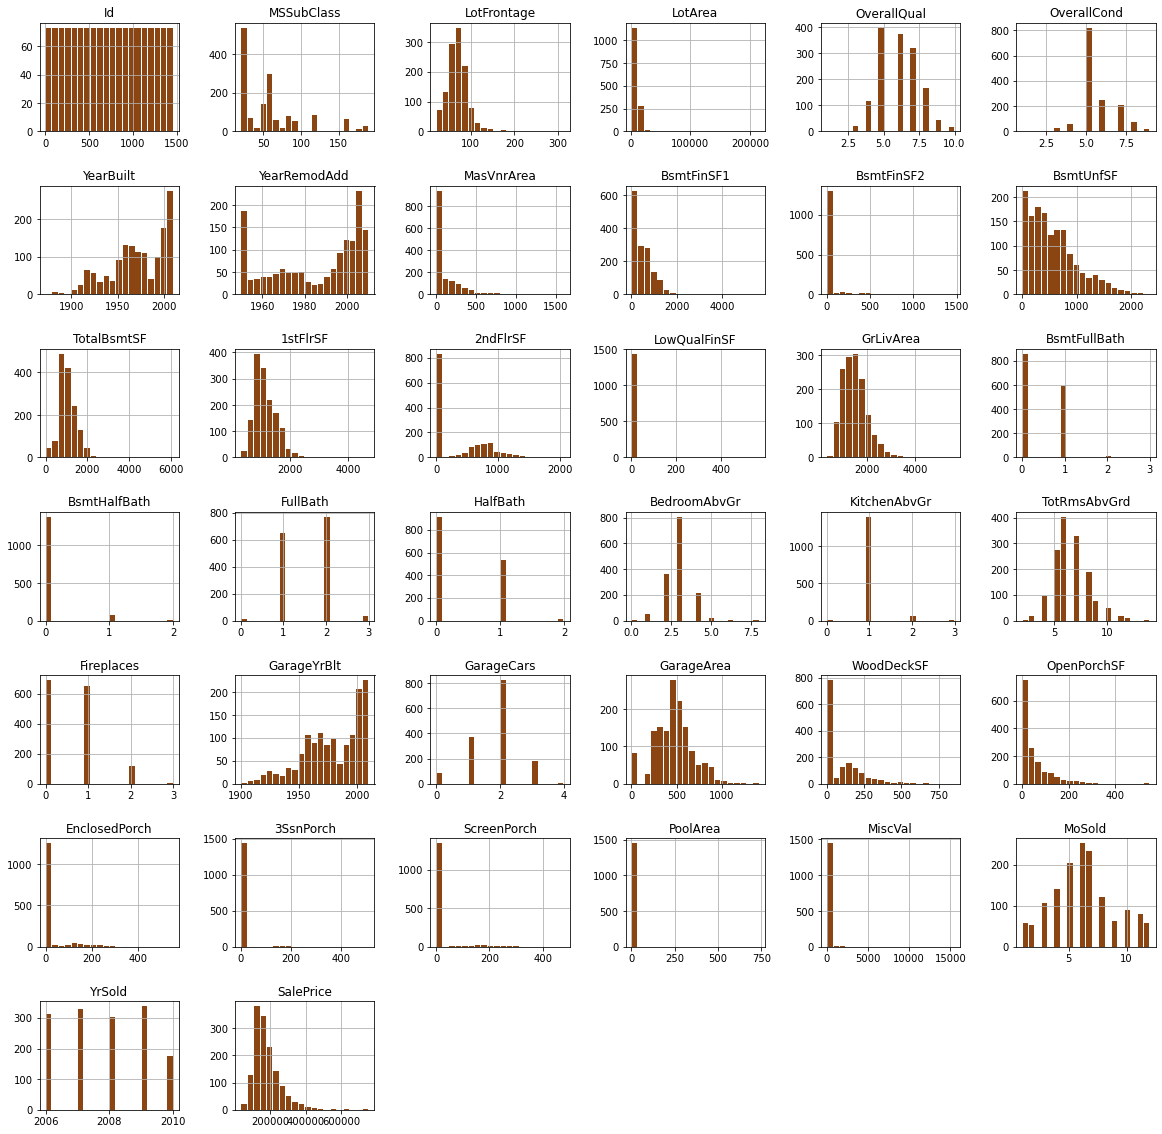

In [13]:
df_train.select_dtypes(np.number).hist(bins=20, rwidth=0.85, color=["saddlebrown"], figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=.4);

In [14]:
categorical_features = df_train.select_dtypes('object').columns
def categorical_plot(feature):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.countplot(x=feature, data=df_train, color='darkgreen', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=12)
    ax.set_title(f'Bar plot of {feature}', fontsize=14)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')    


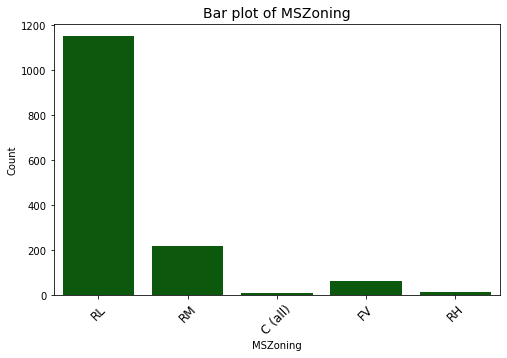

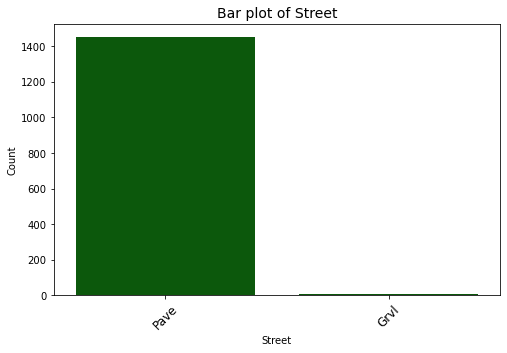

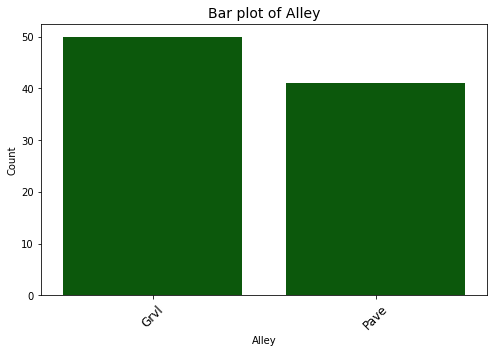

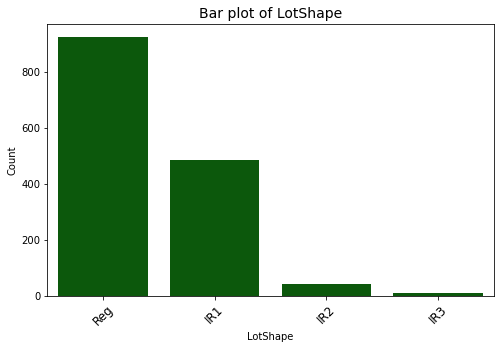

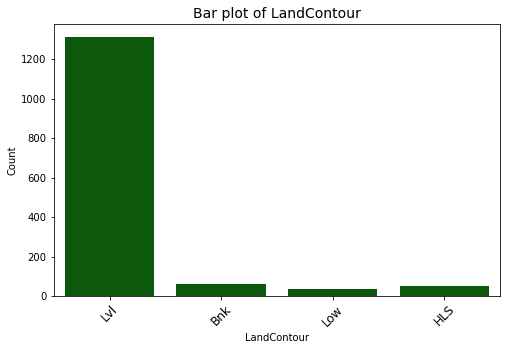

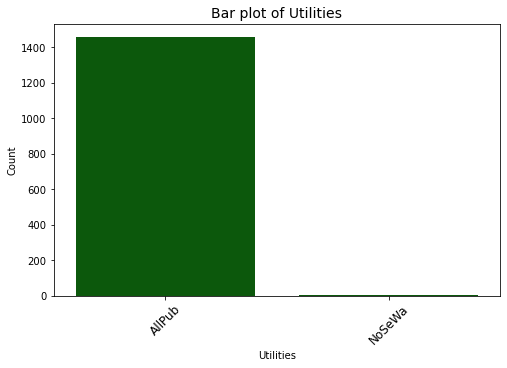

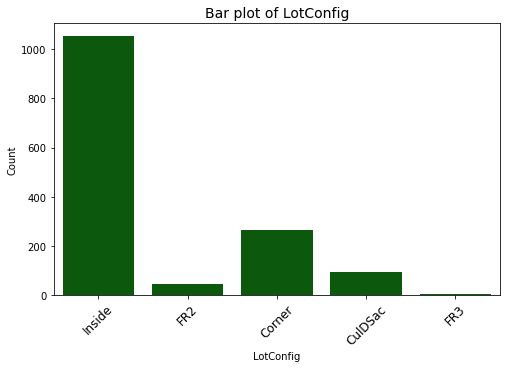

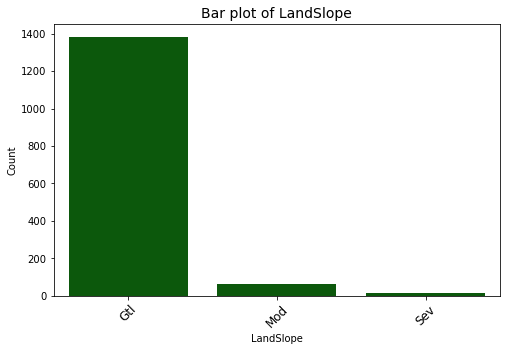

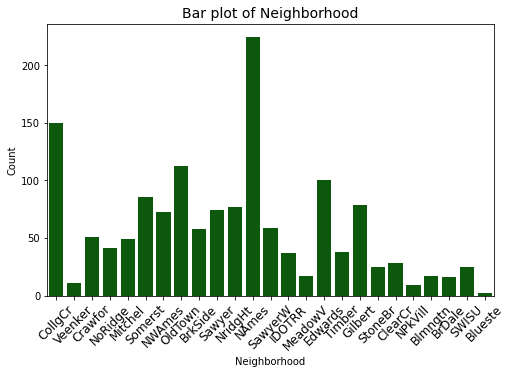

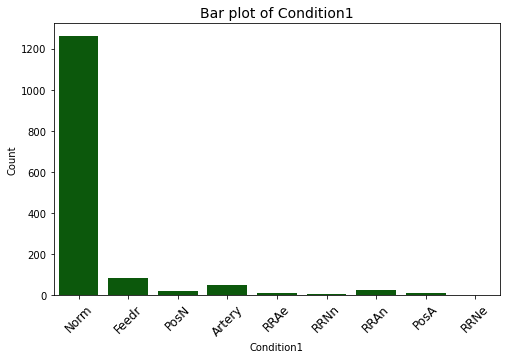

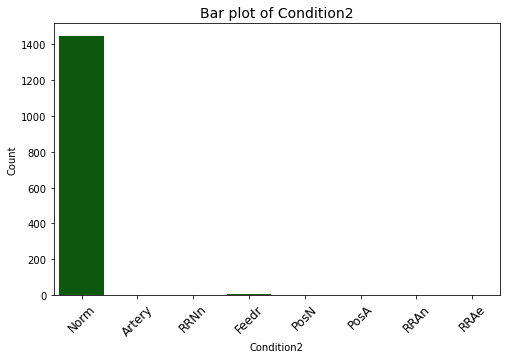

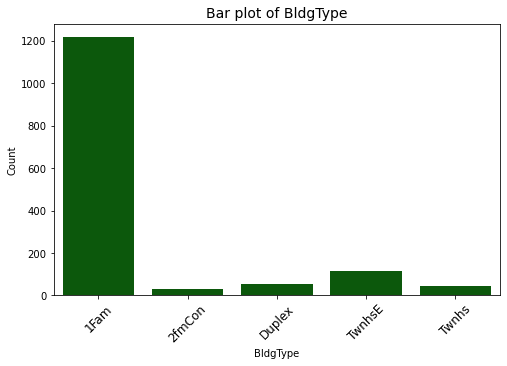

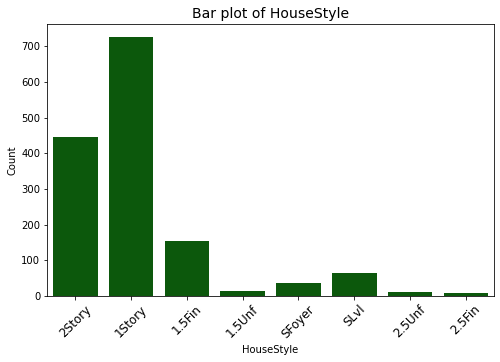

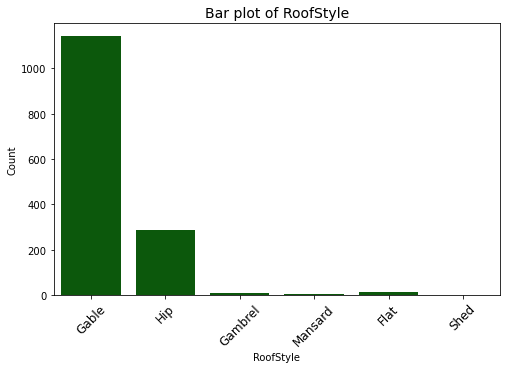

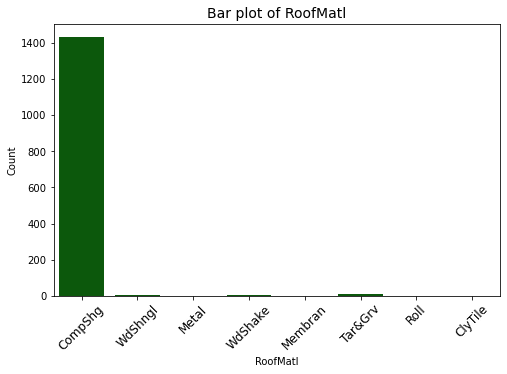

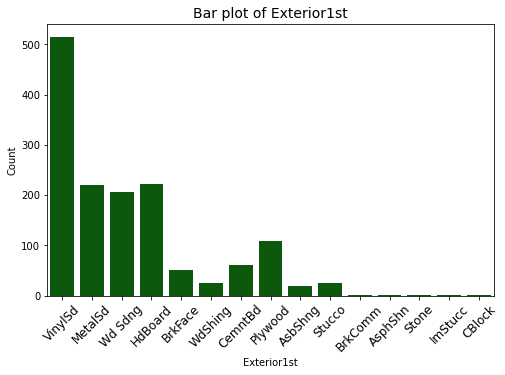

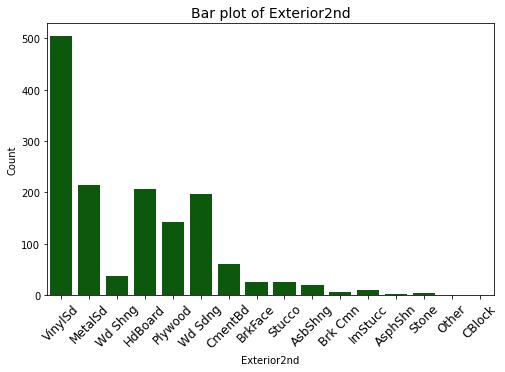

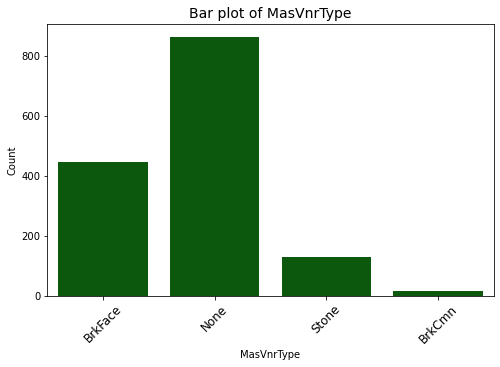

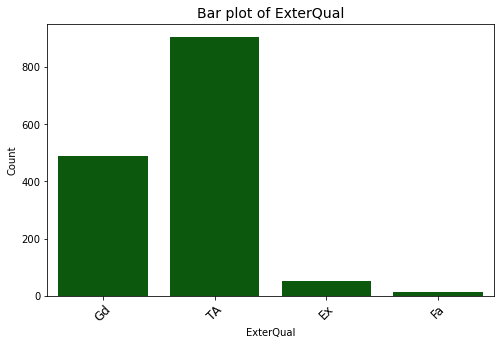

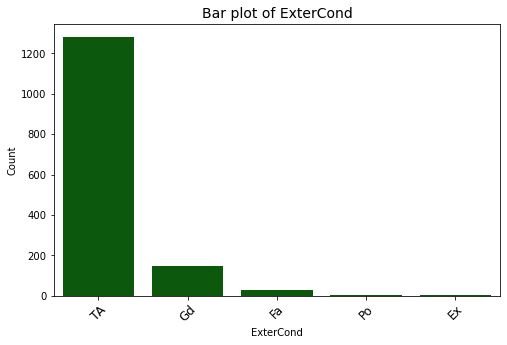

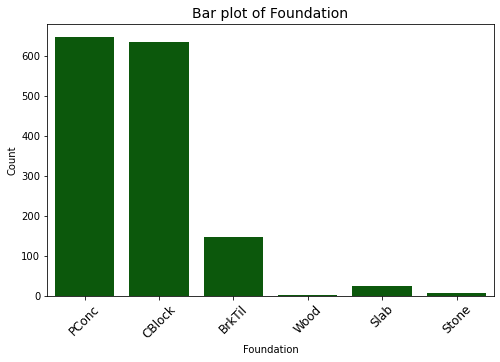

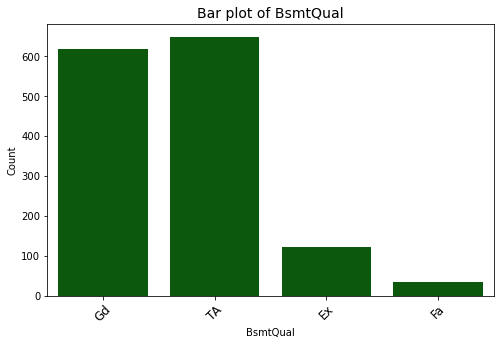

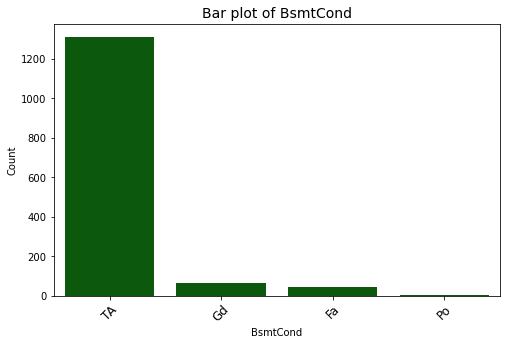

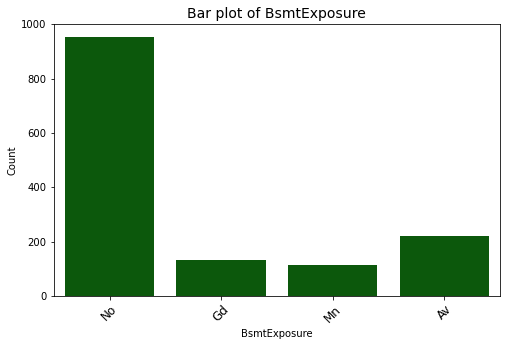

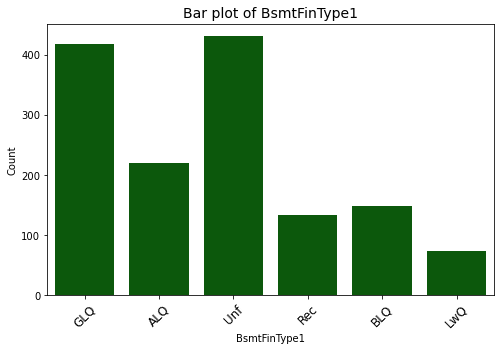

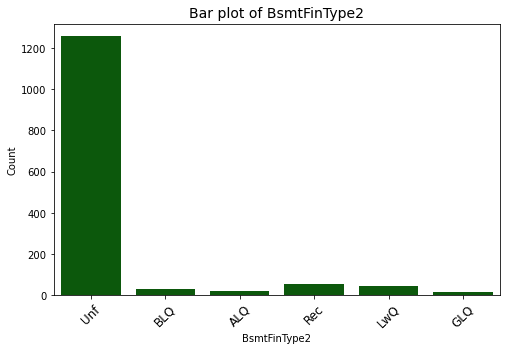

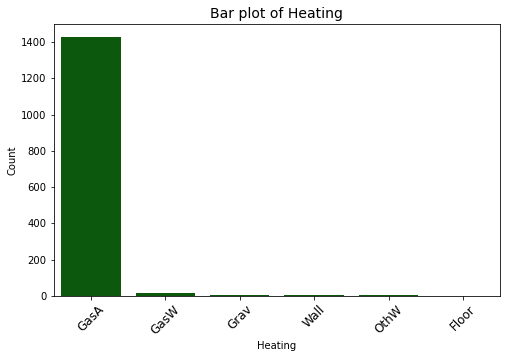

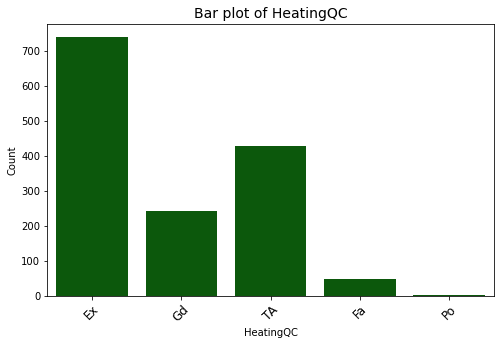

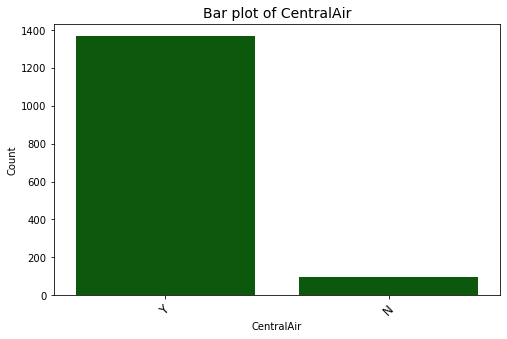

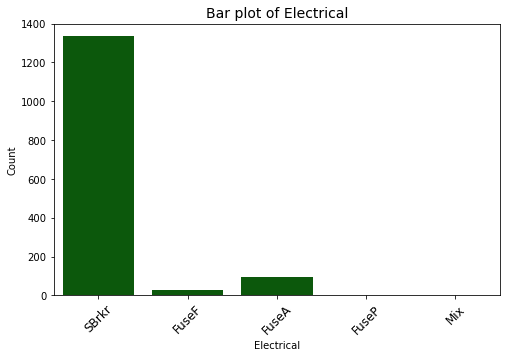

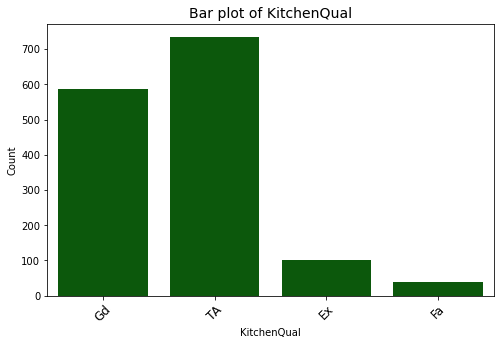

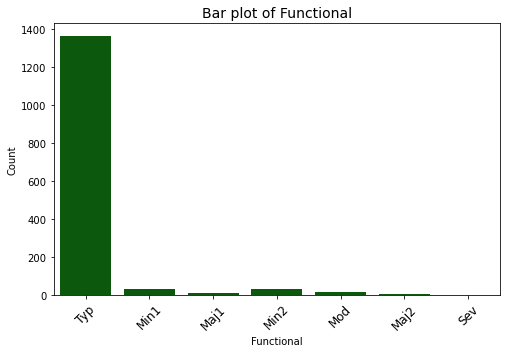

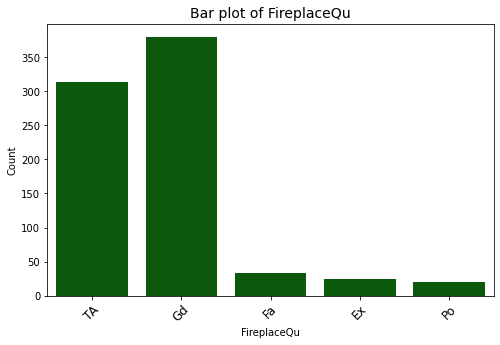

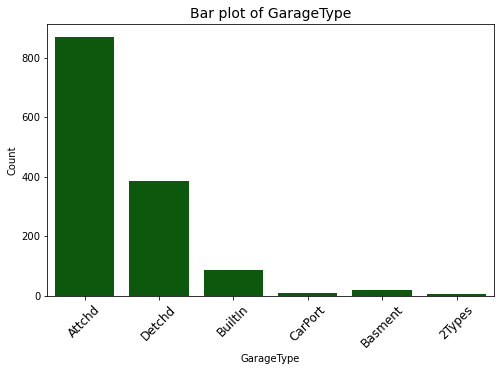

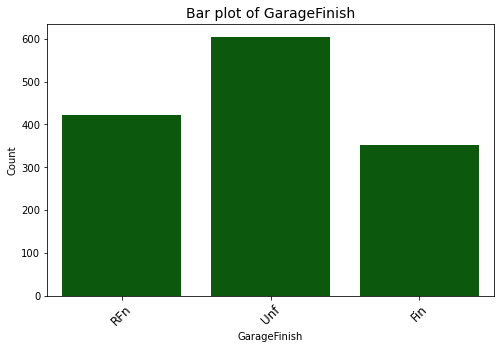

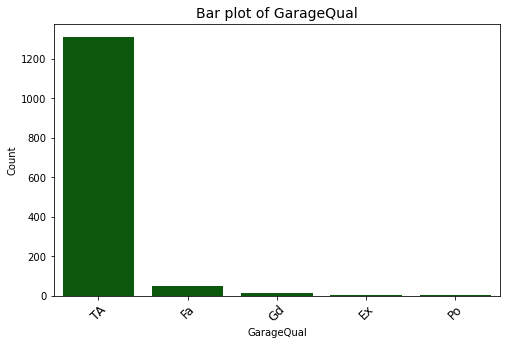

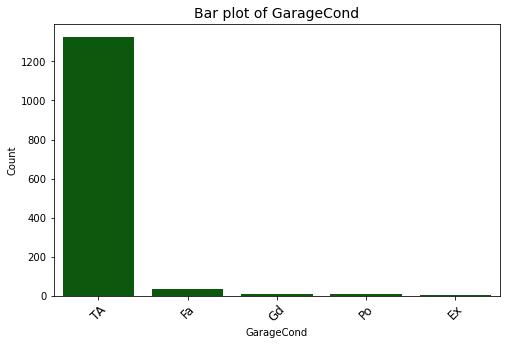

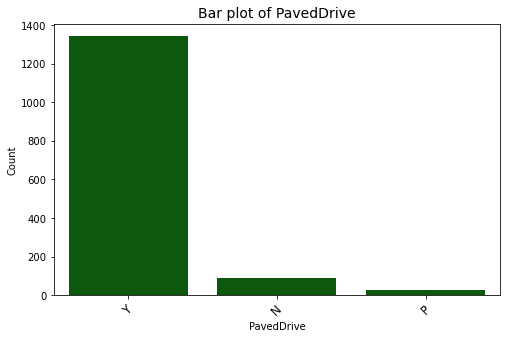

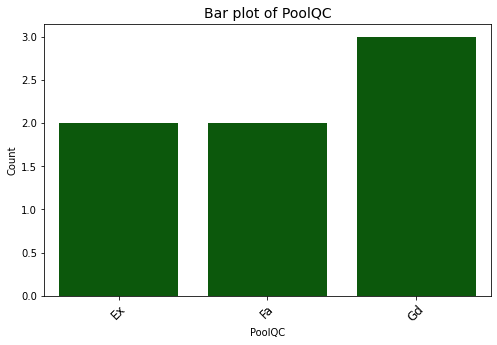

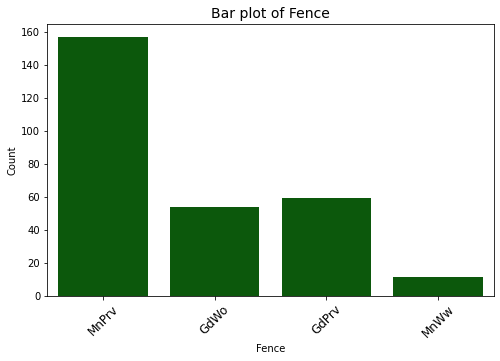

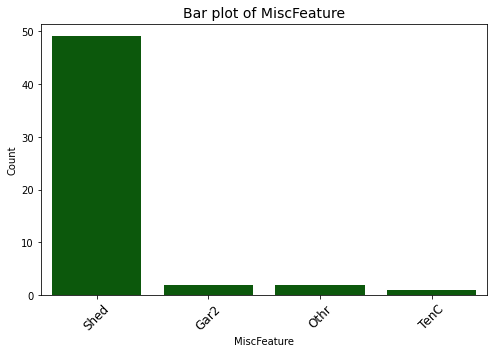

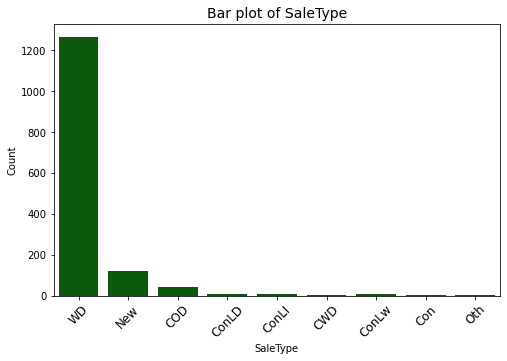

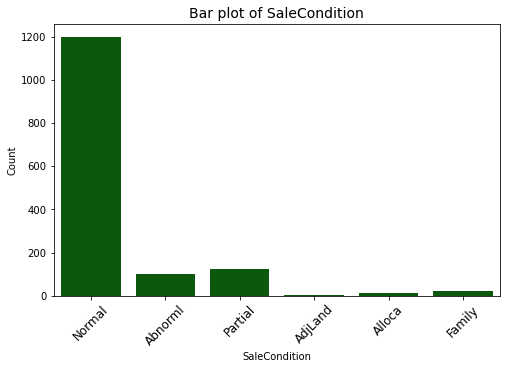

In [15]:
for feature in categorical_features:
    categorical_plot(feature)

## What columns to drop?
Based on missing values I dropped columns with 47% or more missing values

In [16]:
missing_train.sort_values(by='%', ascending=False)[0:5].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [17]:
drop_list = missing_train.sort_values(by='%', ascending=False)[0:5].index
df_train.drop(columns = drop_list, axis=1, inplace=True)
df_test.drop(columns = drop_list, axis=1, inplace=True)

In [18]:
# drop id
df_train.drop(columns='Id', axis=1, inplace=True)
df_test.drop(columns='Id', axis=1, inplace=True)

In [19]:
df_train.shape

(1460, 75)

In [87]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

## Define X and y

<AxesSubplot:>

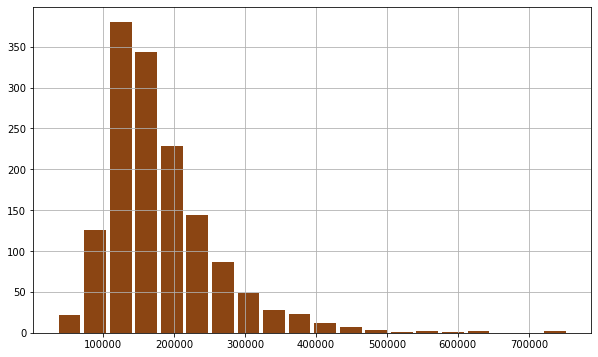

In [39]:
df_train['SalePrice'].hist(bins=20, rwidth=0.85, color=["saddlebrown"], figsize=(10,6))

<AxesSubplot:>

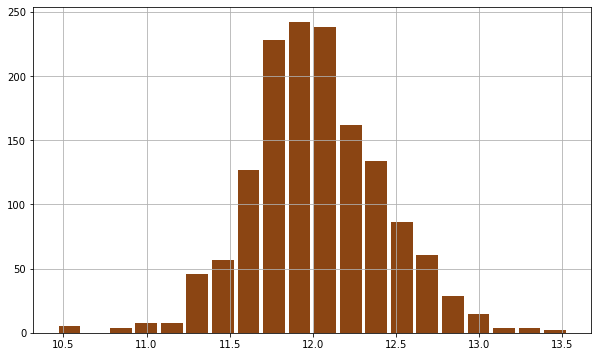

In [41]:
np.log(df_train['SalePrice']).hist(bins=20, rwidth=0.85, color=["saddlebrown"], figsize=(10,6))

In [42]:
y_train = np.log(df_train['SalePrice'])
X_train = df_train.drop(columns='SalePrice', axis=1)

In [43]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [44]:
X_train.isna().sum().sort_values(ascending=False)[0:15]

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
PavedDrive        0
dtype: int64

In [45]:
X_train.isna().sum().sort_values(ascending=False)[0:14].index

Index(['LotFrontage', 'GarageType', 'GarageCond', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical'],
      dtype='object')

In [46]:
missing_col = X_train.isna().sum().sort_values(ascending=False)[0:14].index

In [47]:
X_train[missing_col].dtypes

LotFrontage     float64
GarageType       object
GarageCond       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

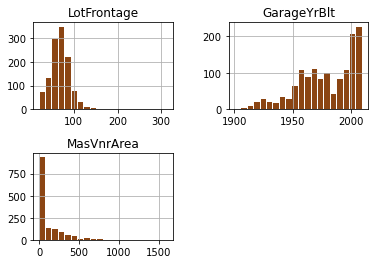

In [48]:
X_train[missing_col].select_dtypes(np.number).hist(bins=20, rwidth=0.85, color=["saddlebrown"])
plt.subplots_adjust(hspace=0.5, wspace=.4);

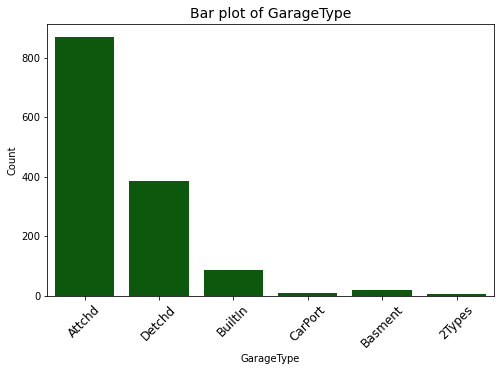

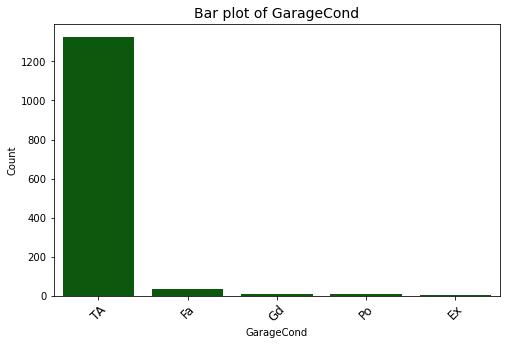

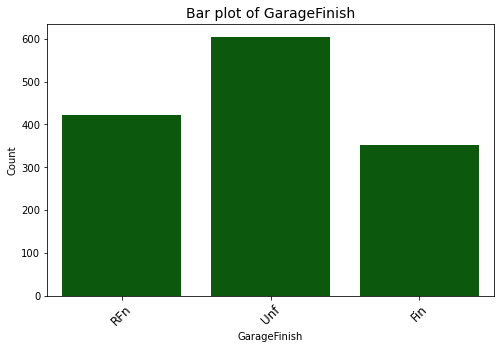

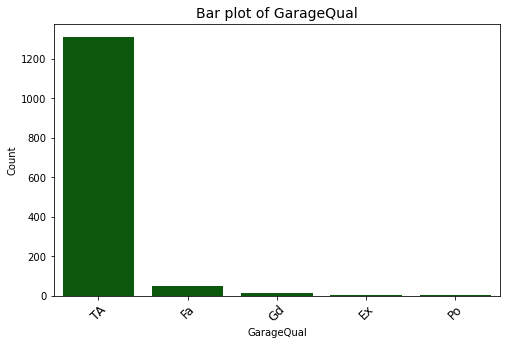

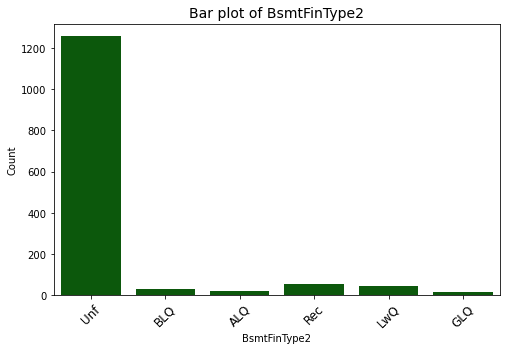

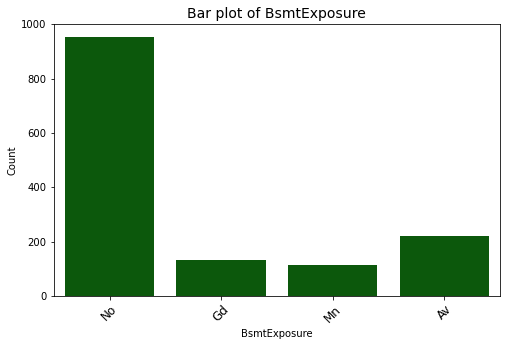

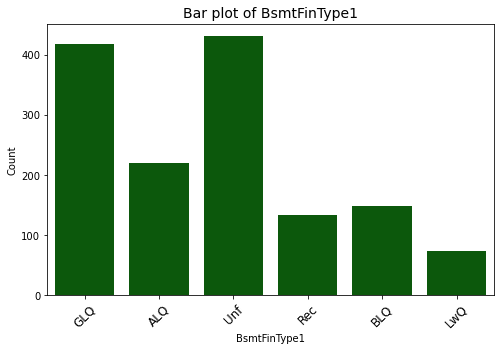

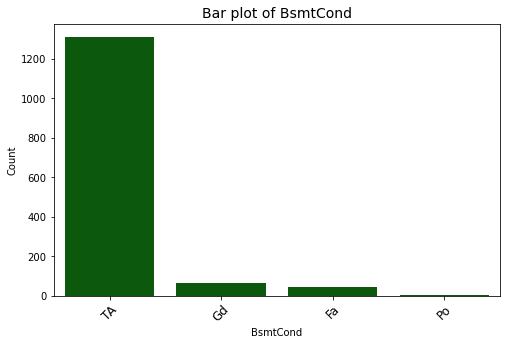

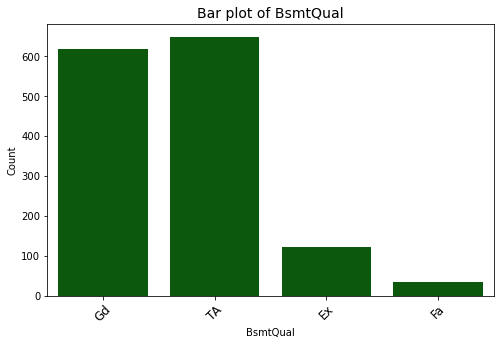

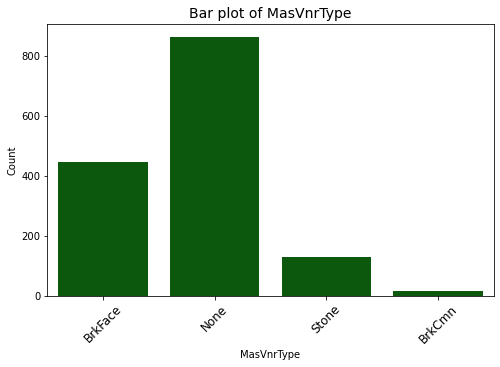

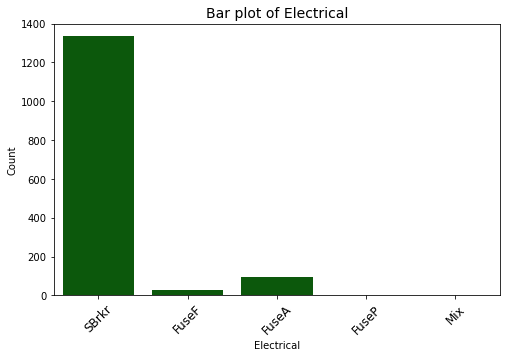

In [27]:
missing_cat = X_train[missing_col].select_dtypes('object')
for feature in missing_cat:
    categorical_plot(feature)

## Impute Data

In [28]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression


from sklearn.inspection import permutation_importance


In [49]:
categorical_columns = X_train.select_dtypes('object').columns

numerical_columns = X_train.select_dtypes('number').columns


categorical_pipe = Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder())])
numerical_pipe = Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_pipe, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ]
)


In [50]:
X_train = preprocessing.fit_transform(X_train)

## Establish a baseline for comparison: DummyRegressor 

In [51]:
dummyregressor = DummyRegressor(strategy='mean')
dummyregressor.fit(X_train, y_train)


DummyRegressor()

In [52]:
y_tr_pred = dummyregressor.predict(X_train)
print('R2 is: {}'.format(r2_score(y_train, y_tr_pred)))
print('Mean Absolute Error is: {}'.format(round(mean_absolute_error(y_train, y_tr_pred), 2)))
print('Mean Squared Error is: {}'.format(round(mean_squared_error(y_train, y_tr_pred), 2)))

R2 is: 0.0
Mean Absolute Error is: 0.31
Mean Squared Error is: 0.16


In [53]:
y_tr_pred

array([12.0240509, 12.0240509, 12.0240509, ..., 12.0240509, 12.0240509,
       12.0240509])

In [54]:
result ={}
result['Dummy'] = y_tr_pred

## First Model: Linear regression

In [55]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_tr_pred = model_lr.predict(X_train)
print('R2 is: {}'.format(r2_score(y_train, y_tr_pred)))
print('Mean Absolute Error is: {}'.format(round(mean_absolute_error(y_train, y_tr_pred), 2)))
print('Mean Squared Error is: {}'.format(round(mean_squared_error(y_train, y_tr_pred), 2)))

R2 is: 0.9427872570143638
Mean Absolute Error is: 0.07
Mean Squared Error is: 0.01


In [56]:
result['Linear'] = y_tr_pred

In [57]:
result

{'Dummy': array([12.0240509, 12.0240509, 12.0240509, ..., 12.0240509, 12.0240509,
        12.0240509]),
 'Linear': array([12.23253426, 12.20655128, 12.26124055, ..., 12.55292563,
        11.86818319, 11.87805118])}

In [58]:
model_lr.coef_

array([-3.36459815e-01,  1.13058510e-01,  9.48616220e-02,  8.42817281e-02,
        4.42579549e-02, -5.31425541e-02,  5.31425541e-02, -1.26236800e-02,
        1.02857721e-02,  7.43295687e-03, -5.09504900e-03, -7.70449706e-03,
        1.83130639e-02, -2.83647910e-02,  1.77562241e-02,  1.14509273e-01,
       -1.14509273e-01,  2.35786383e-02,  5.33569003e-02, -1.37849278e-02,
       -7.24114319e-02,  9.26082105e-03,  5.59677885e-02,  8.83466178e-02,
       -1.44314406e-01,  1.31720927e-02, -4.63871974e-02, -5.38704654e-02,
        1.28383979e-02,  3.13611274e-02, -9.88507881e-03,  1.20345908e-01,
       -7.82427000e-02,  8.64765766e-04, -2.88579447e-02, -1.63985014e-01,
       -4.75836723e-02, -3.34584419e-02,  3.33307288e-04, -3.63097896e-02,
        4.37818300e-02,  8.34733924e-02, -3.99879017e-02,  6.86275997e-03,
       -2.04590918e-02,  3.05646539e-06,  2.88144885e-02,  1.44750867e-01,
        1.56291486e-02,  5.67961556e-02, -4.70135040e-02, -4.18698074e-03,
        4.62954808e-02,  

<1460x270 sparse matrix of type '<class 'numpy.float64'>'
	with 108040 stored elements in Compressed Sparse Row format>